In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline

C:\Users\Hassa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"Downloads\auto.csv")
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
df.shape

(204, 26)

In [5]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

symboling: int64
normalized-losses: object
make: object
fuel-type: object
aspiration: object
num-of-doors: object
body-style: object
drive-wheels: object
engine-location: object
wheel-base: float64
length: float64
width: float64
height: float64
curb-weight: int64
engine-type: object
num-of-cylinders: object
engine-size: int64
fuel-system: object
bore: object
stroke: object
compression-ratio: float64
horsepower: object
peak-rpm: object
city-mpg: int64
highway-mpg: int64
price: object


In [6]:
df2 = df.replace("?",np.nan)
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
df2.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

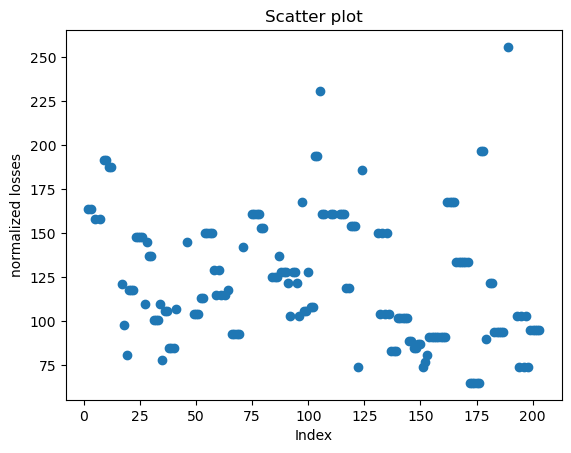

In [8]:
# Dealing with missing values when the missing data is small we can remove it but when missing data is big it is better to
# replace data with mean,mode etc , there are some factors that plays role in choosing thr right method such as outliers and
# skewness of data
plt.scatter(df2.index, df2["normalized-losses"])
plt.xlabel("Index")
plt.ylabel("normalized losses")
plt.title("Scatter plot")
plt.show()

In [9]:
df2["normalized-losses"] = pd.to_numeric(df2["normalized-losses"], errors="coerce")
mean = df2["normalized-losses"].mean()
mode = df2["normalized-losses"].mode().iloc[0]
median = df2["normalized-losses"].median()
print(mean) 
print(mode)
print(median)

122.0
161.0
115.0


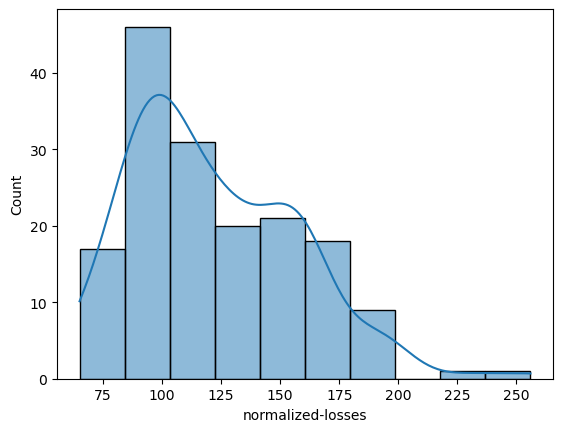

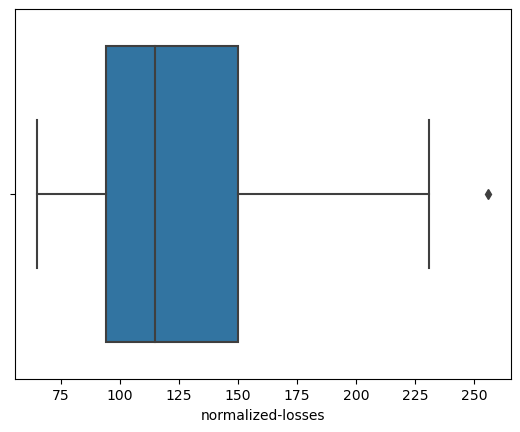

In [10]:
sns.histplot(df2["normalized-losses"], kde=True)
plt.show()

sns.boxplot(x=df2["normalized-losses"])
plt.show()

In [11]:
df2["normalized-losses"].fillna(mean,inplace=True)
df3 = df2.dropna()
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [12]:
df3.shape

(192, 26)

In [13]:
df3["normalized-losses"] = df3["normalized-losses"].astype(int)
df3["bore"] = df3["bore"].astype(float)
df3["stroke"] = df3["stroke"].astype(float)
df3["peak-rpm"] = df3["peak-rpm"].astype(int)
df3["horsepower"] = df3["horsepower"].astype(int)
df3["price"] = df3["price"].astype(int)

C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\2249943751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["normalized-losses"] = df3["normalized-losses"].astype(int)
C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\2249943751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bore"] = df3["bore"].astype(float)
C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\2249943751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [14]:
for column in df3.columns:
    print(f"{column}: {df3[column].dtype}")

symboling: int64
normalized-losses: int32
make: object
fuel-type: object
aspiration: object
num-of-doors: object
body-style: object
drive-wheels: object
engine-location: object
wheel-base: float64
length: float64
width: float64
height: float64
curb-weight: int64
engine-type: object
num-of-cylinders: object
engine-size: int64
fuel-system: object
bore: float64
stroke: float64
compression-ratio: float64
horsepower: int32
peak-rpm: int32
city-mpg: int64
highway-mpg: int64
price: int32


In [15]:
df3["city-L/100km"] = 235/df3["city-mpg"]
df3["highway-L/100km"] = 235/df3["highway-mpg"]
df3.head()

C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\37274703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["city-L/100km"] = 235/df3["city-mpg"]
C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\37274703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["highway-L/100km"] = 235/df3["highway-mpg"]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000


In [16]:
# Min-Max normlization

df3["length"]=(df3["length"]-df3["length"].min())/(df3["length"].max()-df3["length"].min())
df3["length"]

C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\2165974966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["length"]=(df3["length"]-df3["length"].min())/(df3["length"].max()-df3["length"].min())


0      0.413433
1      0.449254
2      0.529851
3      0.529851
4      0.540299
         ...   
199    0.711940
200    0.711940
201    0.711940
202    0.711940
203    0.711940
Name: length, Length: 192, dtype: float64

In [17]:
df3["width"]=(df3["width"]-df3["width"].min())/(df3["width"].max()-df3["width"].min())
df3["width"]

C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\408978592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["width"]=(df3["width"]-df3["width"].min())/(df3["width"].max()-df3["width"].min())


0      0.324786
1      0.444444
2      0.504274
3      0.521368
4      0.512821
         ...   
199    0.735043
200    0.726496
201    0.735043
202    0.735043
203    0.735043
Name: width, Length: 192, dtype: float64

In [18]:
df3["height"]=(df3["height"]-df3["height"].min())/(df3["height"].max()-df3["height"].min())
df3["height"]

C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\473355786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["height"]=(df3["height"]-df3["height"].min())/(df3["height"].max()-df3["height"].min())


0      0.083333
1      0.383333
2      0.541667
3      0.541667
4      0.441667
         ...   
199    0.641667
200    0.641667
201    0.641667
202    0.641667
203    0.641667
Name: height, Length: 192, dtype: float64

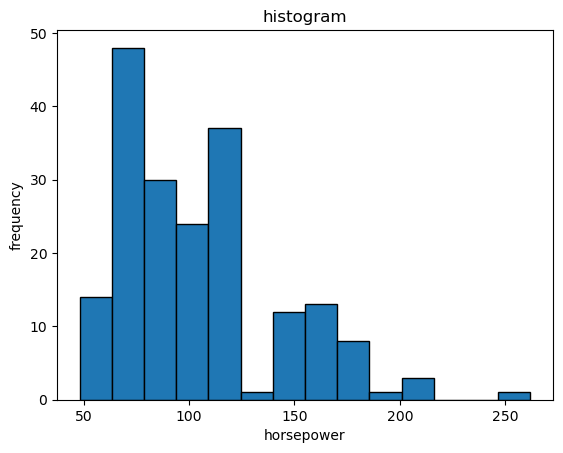

In [19]:
plt.hist(df3["horsepower"], bins='auto',edgecolor='black')
plt.xlabel("horsepower")
plt.ylabel("frequency")
plt.title("histogram")
plt.show()

In [20]:
df3["horsepower_categories"] = pd.cut(df3["horsepower"], bins=3, labels=["Low", "Medium", "High"])
df3.head()

C:\Users\Hassa\AppData\Local\Temp\ipykernel_1120\1291606093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["horsepower_categories"] = pd.cut(df3["horsepower"], bins=3, labels=["Low", "Medium", "High"])


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_categories
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704,Low
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462,Medium
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333,Low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818,Low
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000,Low


In [21]:
print(df3["horsepower_categories"].value_counts())

Low       145
Medium     42
High        5
Name: horsepower_categories, dtype: int64


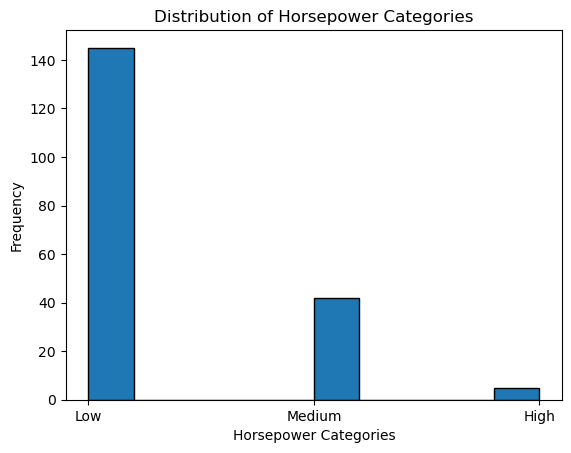

In [22]:
plt.hist(df3["horsepower_categories"], edgecolor="black")
plt.title("Distribution of Horsepower Categories")
plt.xlabel("Horsepower Categories")
plt.ylabel("Frequency")
plt.show()

In [23]:
# since the data is quantitative we will use Pearson correlation 
correlation= df3[["price", "engine-size", "highway-mpg", "peak-rpm", "stroke"]].corr()
correlation

,price,engine-size,highway-mpg,peak-rpm,stroke
price,1.000000,0.888779,-0.719685,-0.103819,0.097082
engine-size,0.888779,1.000000,-0.738001,-0.217746,0.216799
highway-mpg,-0.719685,-0.738001,1.000000,-0.009040,-0.045950
peak-rpm,-0.103819,-0.217746,-0.009040,1.000000,-0.071045
stroke,0.097082,0.216799,-0.045950,-0.071045,1.000000


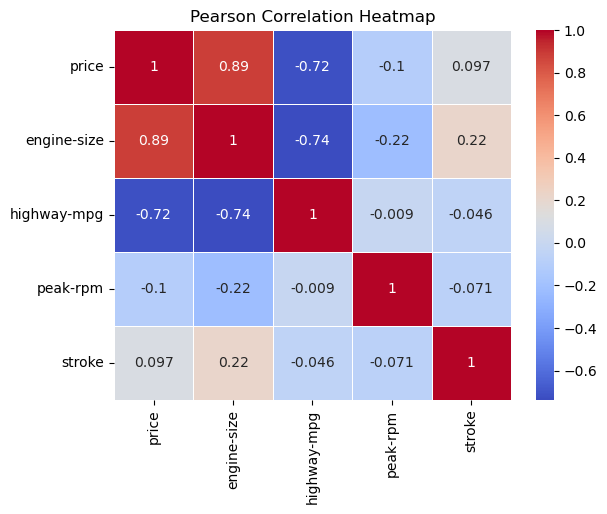

In [24]:
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

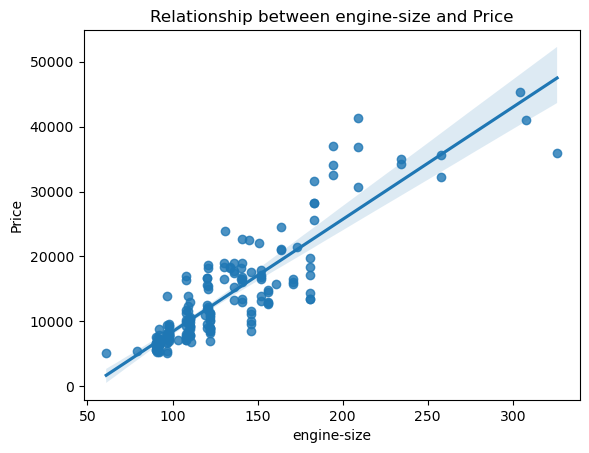

Pearson correlation coefficient between engine-size and price: 0.8887786660054993
P-value: 2.739489902654903e-66


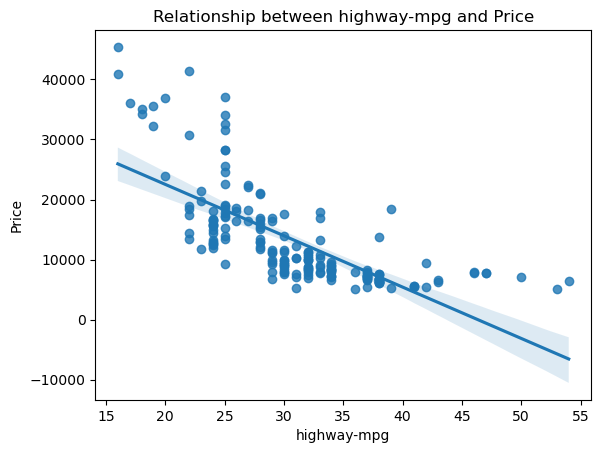

Pearson correlation coefficient between engine-size and price: -0.71968526785602
P-value: 6.263016431316149e-32


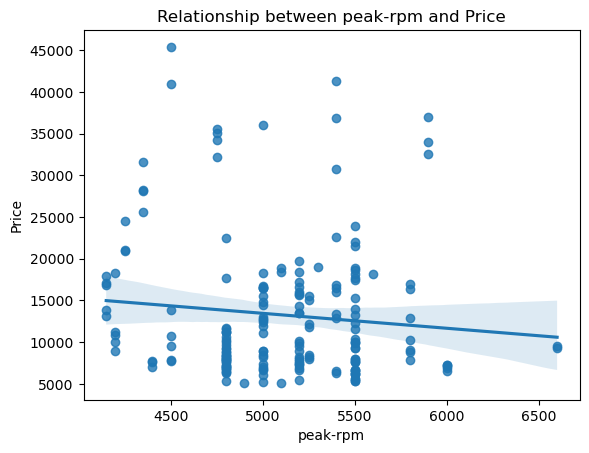

Pearson correlation coefficient between engine-size and price: -0.10381888291686782
P-value: 0.15184692082888296


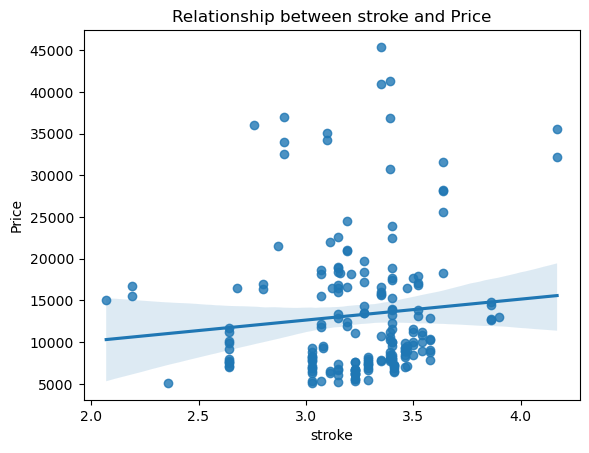

Pearson correlation coefficient between engine-size and price: 0.09708209581655562
P-value: 0.1803782731863056


In [25]:
attributes=["engine-size", "highway-mpg", "peak-rpm", "stroke"]

for attribute in attributes :  
    
    
    sns.regplot(x=attribute, y="price", data=df3)
    plt.title("Relationship between "+attribute +" and Price")
    plt.xlabel(attribute)
    plt.ylabel("Price")
    plt.show()

    # Compute Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(df3[attribute], df3["price"])
    print("Pearson correlation coefficient between engine-size and price:" ,correlation_coefficient)
    print("P-value:" ,p_value)
  


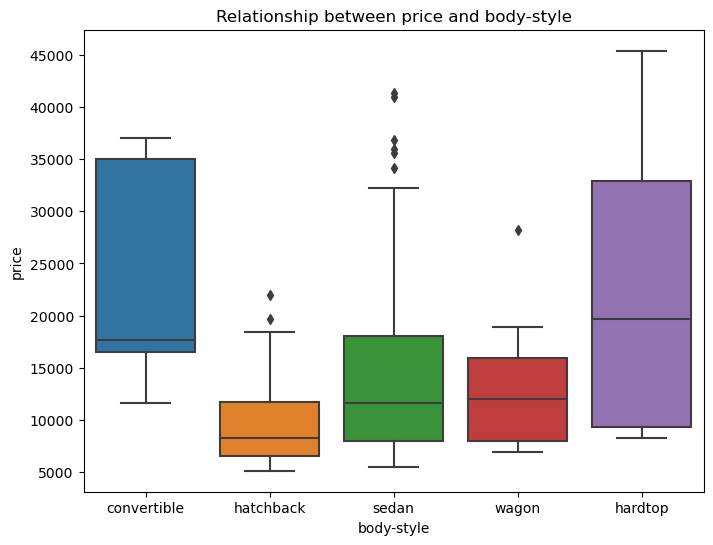

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="body-style", y="price", data=df3)
plt.title("Relationship between price and body-style")
plt.show()
# body style doesnt seem good prediction for price , since price distribution is approximately same between different body styles

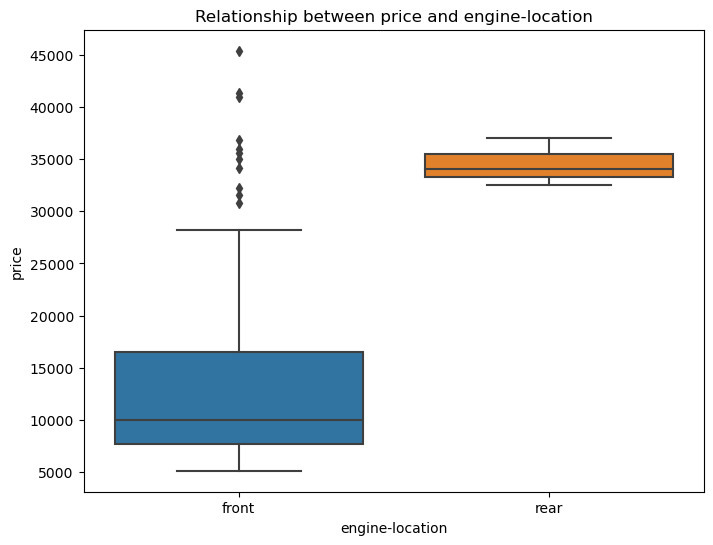

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="engine-location", y="price", data=df3)
plt.title("Relationship between price and engine-location")
plt.show()
# engine location may be a good predictor for price since it is price is varying when engine location is front low price while
# high when location in in rear

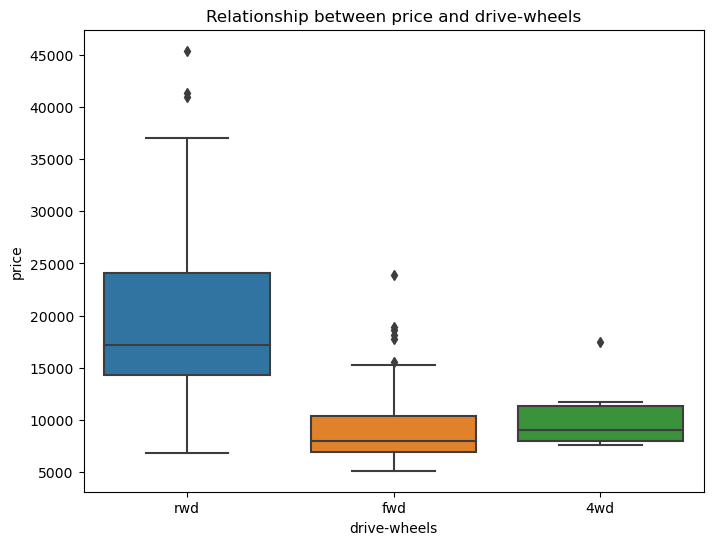

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="drive-wheels", y="price", data=df3)
plt.title("Relationship between price and drive-wheels")
plt.show()
# drive wheels can be a good predict for price as we see price distribution is different between between different type of wheels

In [29]:
average_price_by_drive_wheel = df3.groupby("drive-wheels")["price"].mean()
print("Average Price by Drive Wheel:")
print(average_price_by_drive_wheel)

Average Price by Drive Wheel:
drive-wheels
4wd    10241.000000
fwd     9231.061404
rwd    20232.085714
Name: price, dtype: float64


In [30]:
average_price_by_combination = df3.groupby(["drive-wheels", "body-style"])["price"].mean()
print("Average Price by Combination of Drive Wheel and Body Style:")
print(average_price_by_combination)

Average Price by Combination of Drive Wheel and Body Style:
drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8365.166667
              sedan           9816.905660
              wagon          10061.181818
rwd           convertible    26563.250000
              hardtop        24202.714286
              hatchback      14714.285714
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64


In [38]:
pd.set_option('display.max_columns', None)
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [39]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_categories
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704,Low
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,0.444444,0.383333,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462,Medium
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,0.504274,0.541667,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333,Low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,0.521368,0.541667,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818,Low
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,0.540299,0.512821,0.441667,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000,Low


In [59]:
df4 = df3.iloc[: , :-3]
X = df4.iloc[: , :-1]
Y = df4.iloc[: , -1] 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)


# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), [ "make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location"
                                                        ,"engine-type","num-of-cylinders","fuel-system"])
    ])

# Create a pipeline with the column transformer and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



In [60]:
model.fit(X_test, Y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('regressor', LinearRegression())])

In [61]:
predict = model.predict(X_test)
r2_score(Y_test,predict)

0.9896542448207862

In [62]:
mae = mean_absolute_error(Y_test, predict)
print(mae)

524.6751834466774
